# Hexagonal puzzle



In [46]:
from main import Hex, draw_pieces, Piece, Board, translate, rotate, backtrack
import logging
import time


# Configure logging
logging.basicConfig(
    filename='app.log',  # Log file path
    filemode='a',  # Append mode (use 'w' for overwrite mode)
    format='%(asctime)s - %(levelname)s - %(message)s',  # Include timestamp, log level and message
    level=logging.DEBUG  # Minimum level of messages to log
)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


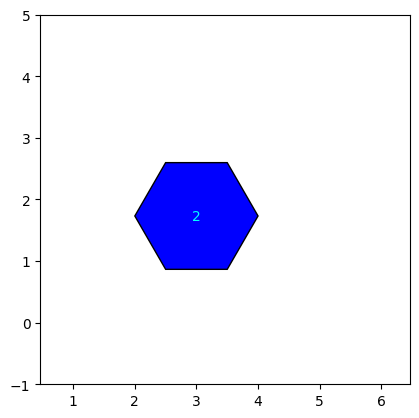

In [47]:
piece = Piece('example', 'blue', [(2,0)])
draw_pieces([piece])


# Pieces


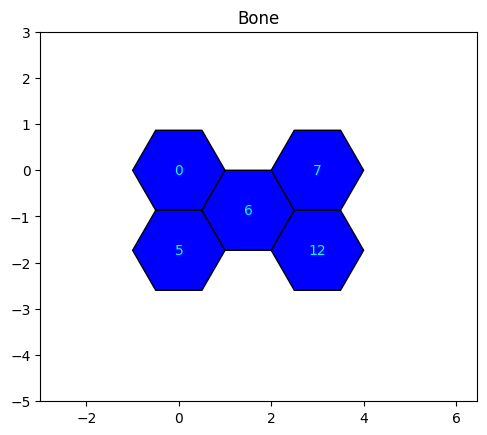

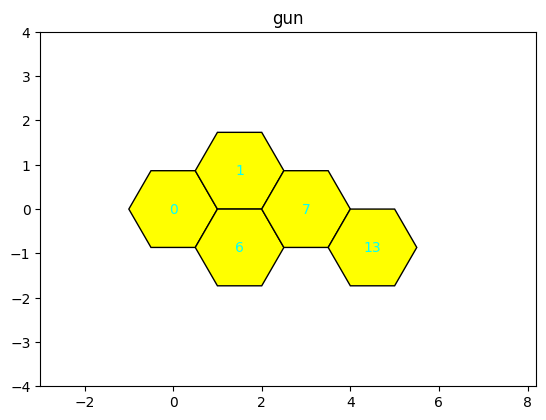

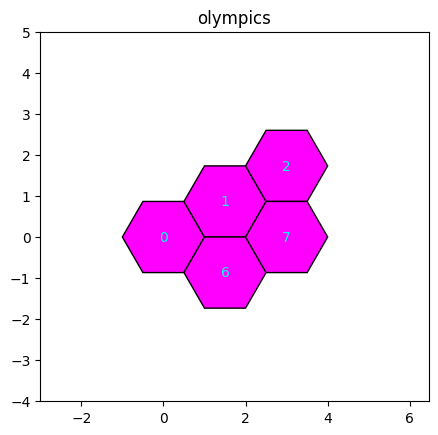

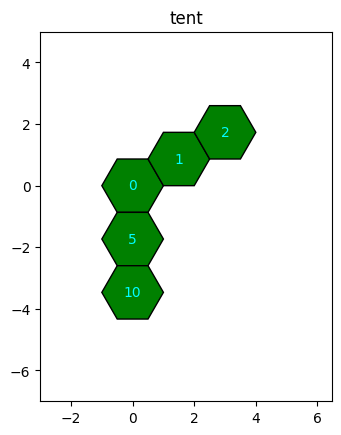

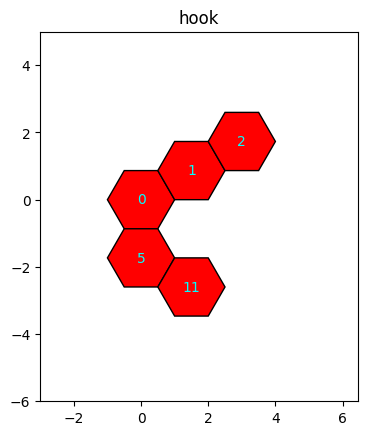

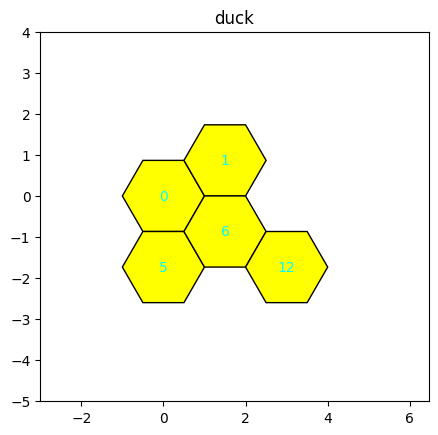

In [48]:
bone = Piece('bone', 'blue', [(0,0), (0,1), (1,1), (2,1), (2,2)], angles=[0, 60, 120])
draw_pieces([bone], title='Bone')

gun = Piece('gun', 'yellow', [(0,0), (1,0), (1,1), (2,1), (3,2)])
draw_pieces([gun], title='gun')

olympics = Piece('olympics', 'magenta', [(0,0), (1,0), (2,0), (1,1), (2,1)])
draw_pieces([olympics], title='olympics')

tent = Piece('tent', 'green', [(0,0), (1,0), (2,0), (0,1), (0,2)])
draw_pieces([tent], title='tent')

hook = Piece('hook', 'red', [(0,0), (1,0), (2,0), (0,1), (1,2)])
draw_pieces([hook], title='hook')

duck = Piece('duck', 'yellow', [(0,0), (1,0), (0,1), (1,1), (2,2)])
draw_pieces([duck], title='duck')

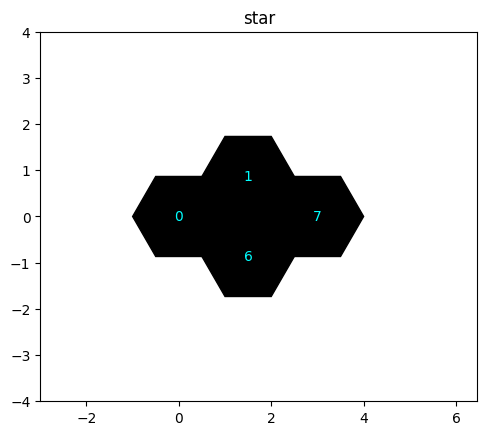

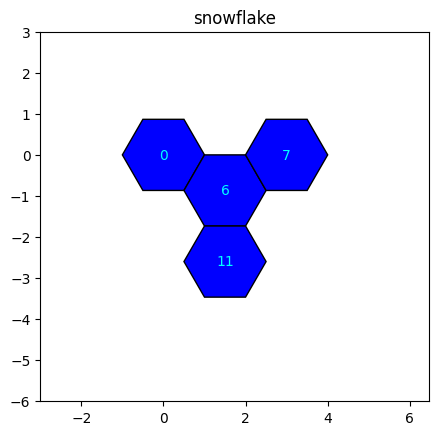

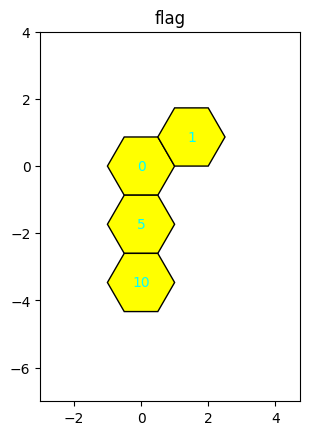

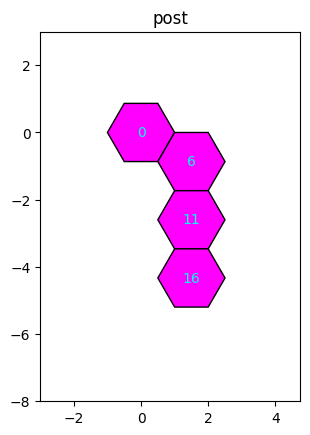

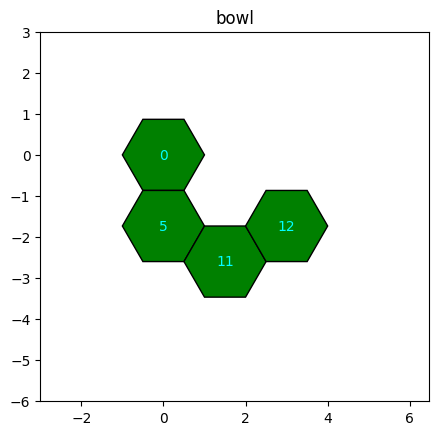

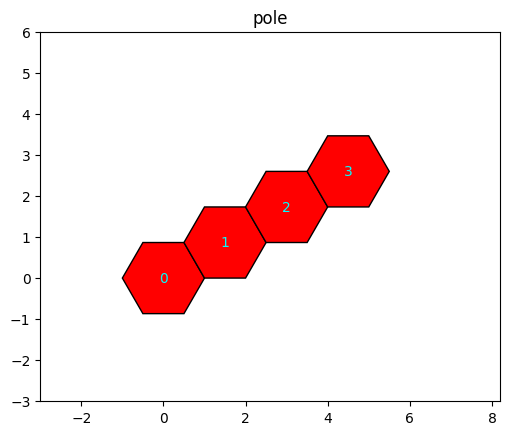

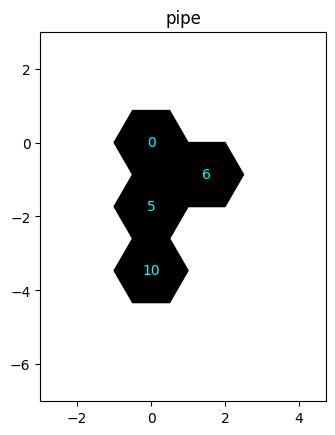

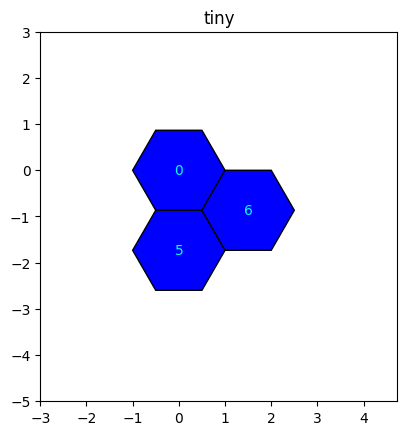

In [49]:

# 4 hex size
star = Piece('star', 'black', [(0,0), (1,0), (1,1), (2,1)], angles=[0, 60, 120])
draw_pieces([star], title='star')

snowflake = Piece('snowflake', 'blue', [(0,0), (1,1), (1,2), (2,1)], angles=[0, 60])
draw_pieces([snowflake], title='snowflake')

flag = Piece('flag', 'yellow', [(0,0), (1,0), (0,1), (0,2)])
draw_pieces([flag], title='flag')

post = Piece('post', 'magenta', [(0,0), (1,1), (1,2), (1,3)])
draw_pieces([post], title='post')

bowl = Piece('bowl', 'green', [(0,0), (0,1), (1,2), (2,2)])
draw_pieces([bowl], title='bowl')

pole = Piece('pole', 'red', [(0,0), (1,0), (2,0), (3,0)], angles=[0, 60, 120])
draw_pieces([pole], title='pole')

pipe = Piece('pipe', 'black', [(0,0), (0,1), (0, 2), (1,1)])
draw_pieces([pipe], title='pipe')

# 3 hex size
tiny = Piece('tiny', 'blue', [(0,0), (0,1), (1,1)], angles=[0, 60])
draw_pieces([tiny], title='tiny')



# Translation and Rotation

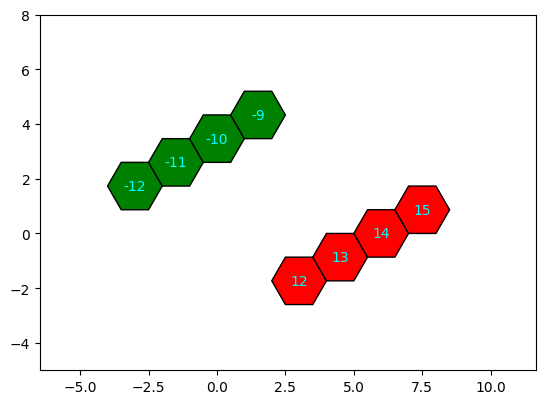

In [50]:
draw_pieces([
    translate(pole, (-2, -2), 'green'), 
    translate(pole, (2, 2))
    ])

And now add rotation (this is tricky to do directly in this skewed system so we'll do this: (x,y) -> (r,theta) -> rotation to delta -> (r,theta + dtheta) -> (x', y')):

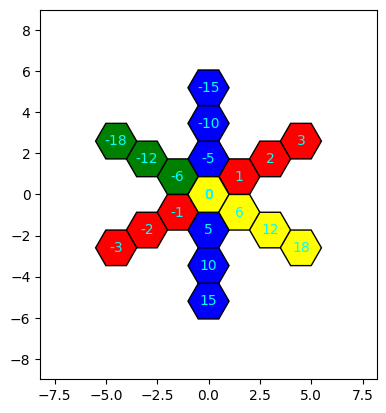

In [51]:
draw_pieces([
    pole, 
    rotate(pole, 60, 'blue'), 
    rotate(pole, 120, 'green'), 
    rotate(pole, 180, 'red'),
    rotate(pole, 240, 'blue'),
    rotate(pole, 300, 'yellow'),
])

# Put piece on the board

In [52]:
translate(pole, (2,0)).hexagons[1].coord

(3, 0)

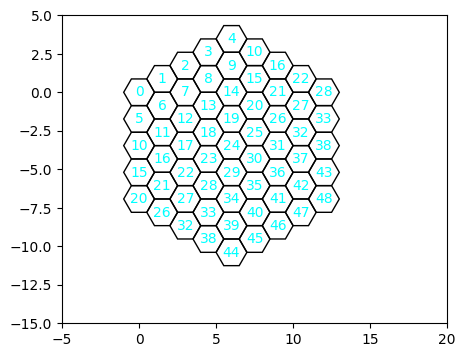

In [53]:
board = Board()
board.draw()

In [54]:
board.add_piece(bone)


True

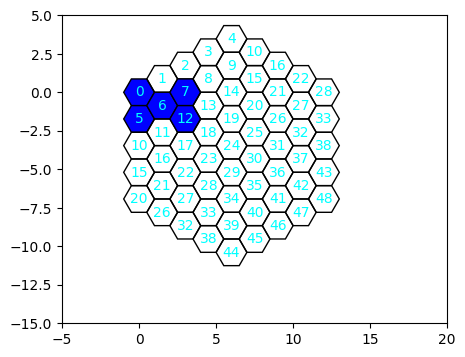

In [55]:
board.draw()

# Backtracking

So now we should implement backtracking. For each piece, and for each rotation, we try to place it on the board. We should also add a heuristics to not go random, in fact, we should always try to put piece next to the already assembled pieces. Let's also try large pieces first, then smaller.

Before we try any of this let's see clarify what solution is: a solution is that no pieces are left, and they all fit within the board.


Let's actually try smaller scope first, since I already know one solution. We'll give it 90% solved board and it will just need to find the last piece:

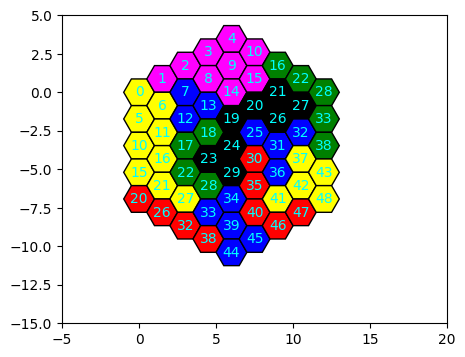

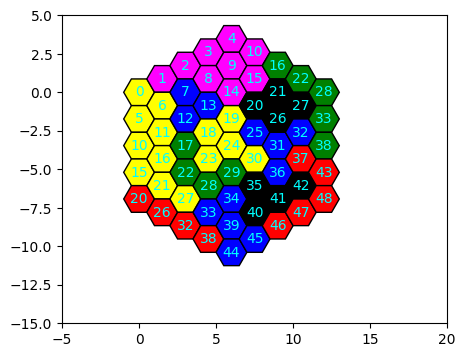

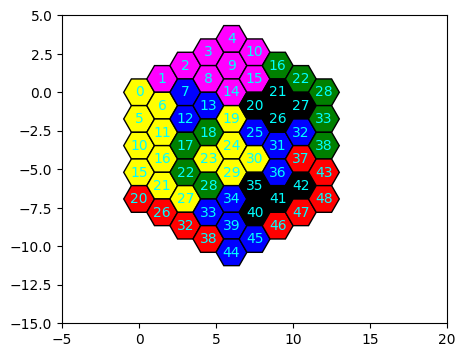

In [73]:
board = Board()
_ = board.add_piece(rotate(gun, 300))
_ = board.add_piece(translate(rotate(olympics, 120), (5,2)))
_ = board.add_piece(translate(rotate(tent, 240), (8,4)))
_ = board.add_piece(translate(rotate(star, 0), (5,3)))
_ = board.add_piece(translate(rotate(snowflake, 0), (5,4)))
_ = board.add_piece(translate(rotate(flag, 60), (0,3)))
_ = board.add_piece(translate(rotate(post, 60), (1,0)))
# _ = board.add_piece(translate(rotate(bowl, 0), (2,3)))
_ = board.add_piece(translate(rotate(tiny, 0), (2,1)))
# _ = board.add_piece(translate(rotate(duck, 0), (3,3)))
# _ = board.add_piece(translate(rotate(bone, 120), (4,8)))
# _ = board.add_piece(translate(rotate(pole, 300), (0,4)))

solutions = []
leftover = [bowl, duck, bone, pole, hook, pipe]  # tiny
n = len(leftover)
tic = time.time()
backtrack(board, leftover, solutions)
toc = time.time()

logging.info(f'For {n} leftovers, found {len(solutions)} solutions in {toc-tic:.2f} seconds')